In [3]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [5]:
count = 0 
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

daisy Folder has 764 Images
dandelion Folder has 1052 Images
rose Folder has 784 Images
sunflower Folder has 733 Images
tulip Folder has 984 Images
Images Folder has 4317 Images


In [7]:
base_dir = 'Images/'
img_size = 180
batch = 32

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [11]:
flower_names = train_ds.class_names
flower_names   

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [13]:
import matplotlib.pyplot as plt

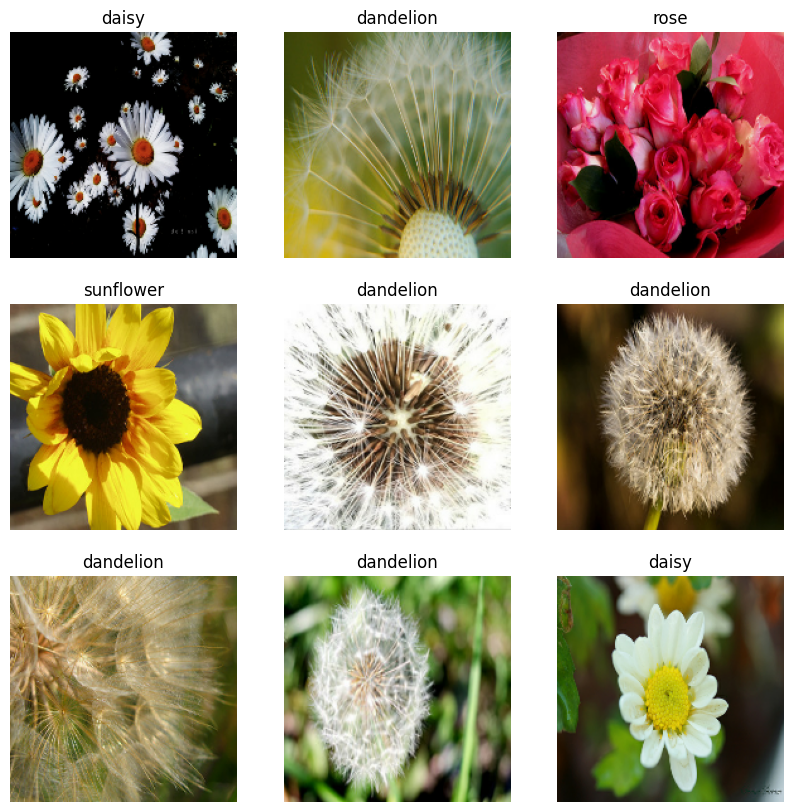

In [15]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')   

In [17]:
AUTOTUNE = tf.data.AUTOTUNE 

In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)  

In [21]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)   

In [23]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])  

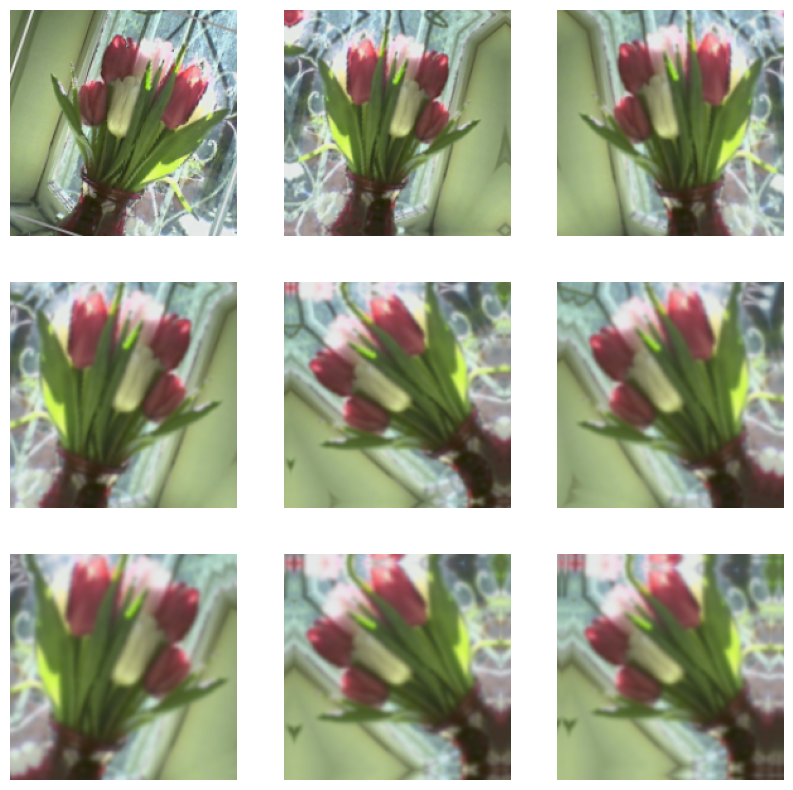

In [25]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [27]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)  

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 274ms/step - accuracy: 0.8250 - loss: 0.4863 - val_accuracy: 0.7219 - val_loss: 0.8197
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 281ms/step - accuracy: 0.8025 - loss: 0.4994 - val_accuracy: 0.6895 - val_loss: 0.8294
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 29s 267ms/step - accuracy: 0.8323 - loss: 0.4403 - val_accuracy: 0.7254 - val_loss: 0.7646
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 29s 272ms/step - accuracy: 0.8401 - loss: 0.4279 - val_accuracy: 0.7335 - val_loss: 0.7412
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 29s 266ms/step - accuracy: 0.8452 - loss: 0.4138 - val_accuracy: 0.7312 - val_loss: 0.7428
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 29s 267ms/step - accuracy: 0.8623 - loss: 0.3827 - val_accuracy: 0.6732 - val_loss: 1.0057
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 277ms/step - accuracy: 0.8461 - loss: 0.4235 - val_accuracy: 0.7404 - val_loss: 0.8423
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 275ms/step - accuracy: 0.8824 - loss: 0

In [35]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome   

In [40]:
classify_images('testImages/daisy.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


'The Image belongs to daisy with a score of 100.0'